# Case Study on Probability for Data Science
#### Problem Statement : Make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.

#### Attributes info:
 - cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
        
 - cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
    
 - cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,
red=e, white=w, yellow=y 

 - bruises: bruises=t, no=f 
    
 - odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,
pungent=p, spicy=s 

 - gill-attachment: attached=a, descending=d, free=f, notched=n 
    
 - gill-spacing: close=c, crowded=w, distant=d 
    
 - gill-size: broad=b, narrow=n 
    
 - gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, 
pink=p, purple=u, red=e, white=w, yellow=y

 - stalk-shape: enlarging=e, tapering=t 
    
 - Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, 
missing=? 

 - stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
    
 - stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
#loading dataset to python environment
pd.set_option('display.max_columns', 23)
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape                  # mushroom dataset with 8124 entries with 23 columns

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#checking null values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values in the given dataset.

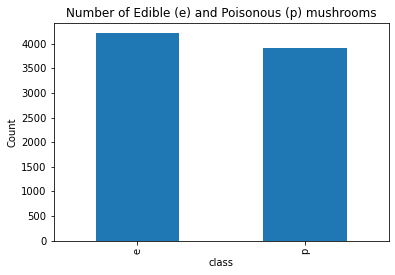

In [6]:
#plotting number of edible and non-edible mushrooms
df['class'].value_counts().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title("Number of Edible (e) and Poisonous (p) mushrooms")
plt.show()

Edible mushrooms are denoted by '0' and it is more in number from the dataset.

In [7]:
df.describe()  #Extracting statistical data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Since our dataset contains only categorical variables we have to convert it into numerical for creating model. For that encoding is used. 

#### Label Encoding

In [9]:
#label encoding target column 'class'
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [10]:
#checking columns with unique values
columns = ['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
uniques = {col: df[col].unique() for col in columns}
uniques

{'cap-shape': array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object),
 'cap-surface': array(['s', 'y', 'f', 'g'], dtype=object),
 'cap-color': array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
 'bruises': array(['t', 'f'], dtype=object),
 'odor': array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
 'gill-attachment': array(['f', 'a'], dtype=object),
 'gill-spacing': array(['c', 'w'], dtype=object),
 'gill-size': array(['n', 'b'], dtype=object),
 'gill-color': array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
       dtype=object),
 'stalk-shape': array(['e', 't'], dtype=object),
 'stalk-root': array(['e', 'c', 'b', 'r', '?'], dtype=object),
 'stalk-surface-above-ring': array(['s', 'f', 'k', 'y'], dtype=object),
 'stalk-surface-below-ring': array(['s', 'f', 'y', 'k'], dtype=object),
 'stalk-color-above-ring': array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object),
 'stalk-color-below-ring': array(['w', 'p', 'g', 'b', 'n', 

In [11]:
df['veil-type'].nunique()

1

In [12]:
df = df.drop(['veil-type'],axis=1) # dropping column 'veil type' since it have single value that not contributing to ML.

#### Splitting data into target set and feature set

In [13]:
x = df.drop(['class'],axis=1)     # x is feature set and y is target(ie,'class')
y = df['class']

#### OneHot Encoding

In [14]:
#one hot encoding feature set x
x=pd.get_dummies(x)
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0


#### Splitting data into train and test data

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [16]:
y_test.shape

(2438,)

In [17]:
x_test.shape

(2438, 116)

In [18]:
y_train.shape

(5686,)

In [19]:
x_train.shape

(5686, 116)

## Model1:  K- Nearest Neighbors (K-NN)

In [20]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

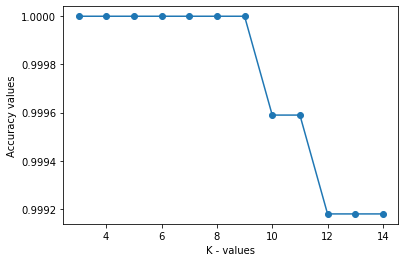

In [21]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [22]:
# Remarks: Accuracy is high for K values: 3,4,5,6,7,8,9. we can use any of the k value to make model.

In [23]:
# taking K=3
Classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [25]:
kn=confusion_matrix(y_test,y_pred)
kn

array([[1257,    0],
       [   0, 1181]], dtype=int64)

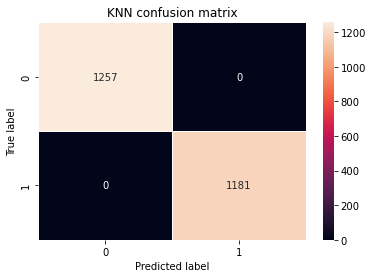

In [26]:
sns.heatmap(kn, annot = True,  linewidths=0.5,fmt ='d',cbar = True)
plt.title('KNN confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Remarks: KNN model have accuracy score of 1.00 and there are no misclassifiers in this model.

## Model 2:  Support Vector Machine (SVM)

In [27]:
#linear svm 
svm_linear = SVC(kernel ='linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [29]:
sv=confusion_matrix(y_test,y_pred)
sv

array([[1257,    0],
       [   0, 1181]], dtype=int64)

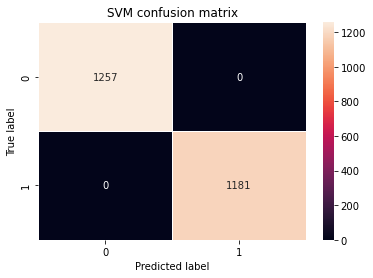

In [30]:
sns.heatmap(sv, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('SVM confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Remarks: SVM linear model has accuracy score 1.0 and without any misclassifiers.

## Model 3: Random Forest Classifier

In [31]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [33]:
rf=confusion_matrix(y_test,y_pred)
rf

array([[1257,    0],
       [   0, 1181]], dtype=int64)

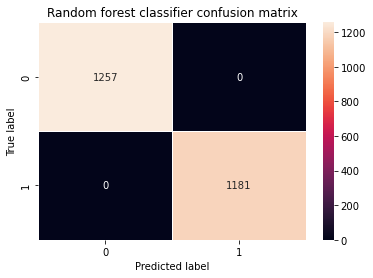

In [34]:
sns.heatmap(rf, annot = True, fmt="d",  linewidths=.5, cbar = True)
plt.title('Random forest classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Remarks: Random Forest classifier has accuracy score 1.0 without any misclassifiers.

 from confusion matrix of above three models : True positive(TP) = 1257, True negative(TN)= 1181, False negative(FN) & False positive(FP) = 0

Receiver Operating Characteristic (ROC) Curve can be used to evaluate classifier output quality.
On x-axis False positive rate(FPR) & on y-axis True positive Rate(TPR) are plotted. 
The top left corner of the plot is the ideal point ( FPR = 0  and TPR = 1). 
Accuracy of classifier is measured by the area under the ROC curve.

### ROC curve

In [35]:
# finding area under curve (auc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

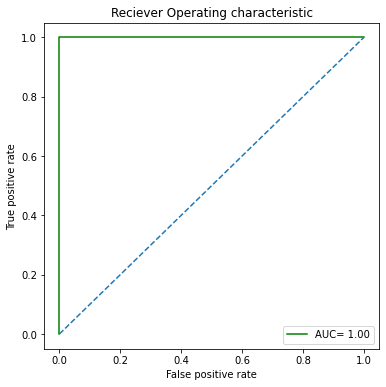

In [36]:
# plotting ROC curve
plt.figure(figsize=(6,6))
plt.title('Reciever Operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='green', label= 'AUC= %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], linestyle="dashed")
plt.axis('tight')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

#### Findings: All the above models have 100% accuracy and ROC Curve shows AUC 1.00.

## Model 4: Naive Bayes classifier

### a) Gaussian Naive Bayes

In [37]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [38]:
#prediction of the test set result
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [39]:
# making confusion matrix
cmg = confusion_matrix(y_test, y_pred)
print(cmg)

[[1171   86]
 [   1 1180]]


In [40]:
accuracy_score(y_test, y_pred)

0.9643150123051681

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1257
           1       0.93      1.00      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.97      0.97      0.96      2438
weighted avg       0.97      0.96      0.96      2438



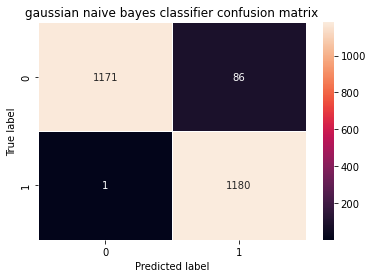

In [42]:
sns.heatmap(cmg, annot = True,  linewidths=.5, fmt= "d", cbar = True)
plt.title('gaussian naive bayes classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

TP = 1171, TN = 1180, FN = 1,  FP = 86

In [43]:
# finding area under curve (auc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9653681971981459

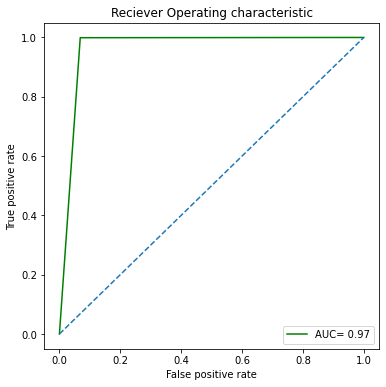

In [44]:
plt.figure(figsize=(6,6))
plt.title('Reciever Operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='green', label= 'AUC= %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], linestyle="dashed")
plt.axis('tight')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

#### Remarks: 
 - Gaussian naive bayes classifier has an accuracy score of 0.96 and there are misclassifications.
 - ROC curve shows Area under curve (AUC) 0.97.

### b) Bernoulli Naive Bayes

In [45]:
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

BernoulliNB()

In [46]:
# prediction of test set result

In [47]:
y_pred = classifier.predict(x_test)

In [48]:
accuracy_score(y_test, y_pred)

0.9343724364232978

In [49]:
#Making confusion matrix
cmb = confusion_matrix(y_test, y_pred)
print(cmb)

[[1241   16]
 [ 144 1037]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1257
           1       0.98      0.88      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.94      0.93      0.93      2438



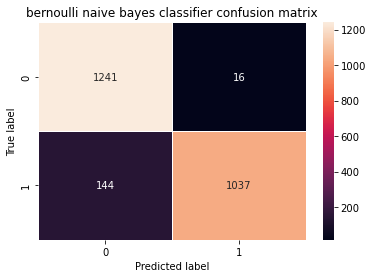

In [51]:
sns.heatmap(cmb, annot = True, fmt="d", linewidths=.5, cbar = True)
plt.title('bernoulli naive bayes classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

TP = 1241, TN = 1037 , FN = 144 , FP = 16

In [52]:
# finding area under curve (auc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9326703567557663

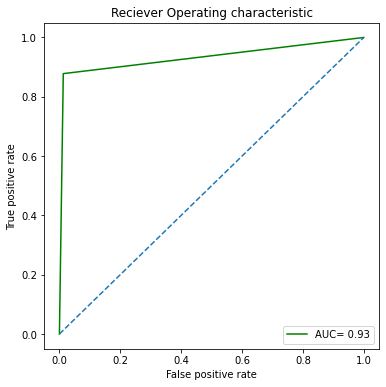

In [53]:
plt.figure(figsize=(6,6))
plt.title('Reciever Operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='green', label= 'AUC= %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], linestyle="dashed")
plt.axis('tight')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

#### Remarks:
 - Accuracy score for Bernoulli Naive Bayes classifier is 0.93 with lots of misclassifiers.
 - ROC curve shows Area under curve (AUC) 0.93.

### c) Multinomial Naive Bayes

In [54]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [55]:
y_pred = classifier.predict(x_test)

In [56]:
accuracy_score(y_test, y_pred)

0.9458572600492207

In [57]:
cmm = confusion_matrix(y_test, y_pred)
cmm

array([[1252,    5],
       [ 127, 1054]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1257
           1       1.00      0.89      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438



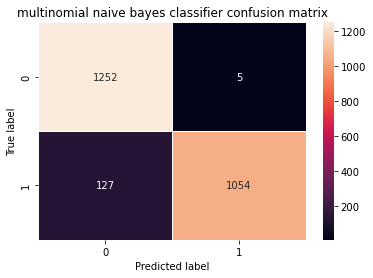

In [59]:
sns.heatmap(cmm, annot = True,  linewidths=.5, fmt = "d",cbar = True)
plt.title('multinomial naive bayes classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

TP = 1252, TN = 1054, FN = 127, FP = 5

#### ROC Curve

In [60]:
# finding area under curve (auc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9442431444031965

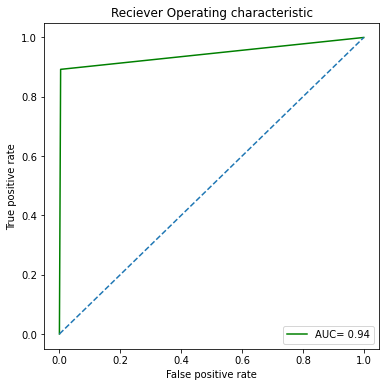

In [61]:
plt.figure(figsize=(6,6))
plt.title('Reciever Operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='green', label= 'AUC= %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], linestyle="dashed")
plt.axis('tight')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

#### Remarks:
 - Accuracy score for multinomial naive bayes is 0.95 and there are many misclassifiers.
 - ROC curve shows Area under curve (AUC) 0.94

## Inference
### The models KNN, SVM linear, Random forest classifier have 100% accuracy. So any of these models can be used to predict whether the mushroom is edible or not.

##### Sruthy B (DSA-B3)